In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import cv2
from skimage.transform import resize

In [6]:
from os import listdir
from os.path import isfile, join

img_dir = "./imgs/"

img_paths = [img_dir + f for f in listdir(img_dir) if isfile(join(img_dir, f))]
num_images = len(img_paths)
print(img_paths)

['./imgs/f1-11_lamps_000_test.png', './imgs/f1-11_lamps_000_train.png']


In [7]:
# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

from gradcam import load_image
from keras.models import load_model
img_width = 32
img_height = 32

model = load_model('model_0.h5')

img_paths = img_paths[0:1+1]

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        1010      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total para

In [9]:
print(img_paths)
weights = model.layers[-1].get_weights()
weights

['./imgs/f1-11_lamps_000_test.png', './imgs/f1-11_lamps_000_train.png']


[array([[-0.21156204, -0.13217826, -0.16169389, -0.03166583,  0.16833061,
          0.15693063,  0.11927397, -0.0432776 , -0.03156236, -0.0356377 ],
        [ 0.05040531, -0.22035867, -0.14994256,  0.09430298, -0.32148248,
         -0.06943223, -0.11768761,  0.03771943,  0.08491956, -0.28860712],
        [ 0.30032068, -0.3040462 ,  0.19053692, -0.07180922,  0.26938227,
          0.14252008,  0.21624556, -0.10588841, -0.31931436, -0.00275649],
        [ 0.09125967,  0.10620989,  0.13207853, -0.01997691,  0.00424373,
         -0.04842941, -0.10014489, -0.01403316, -0.12873617, -0.00693427],
        [ 0.10181449, -0.17104018, -0.08516291, -0.1111724 , -0.06703936,
         -0.18506132, -0.03135105,  0.11923384,  0.05204954,  0.03233589],
        [-0.42690706,  0.15840255, -0.03209123,  0.22840297, -0.04638565,
         -0.3492467 ,  0.17142226,  0.11832756, -0.08749832, -0.26809675],
        [-0.28832498, -0.2490669 ,  0.15936737,  0.11346424,  0.24015947,
         -0.3059428 ,  0.2588769

In [19]:
from vis.utils import utils # Import Keras vis module
from keras import activations
import os

all_layer_names = [layer.name for layer in model.layers]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
# layer_idx = utils.find_layer_idx(model, 'dense_1')
layer_idx = utils.find_layer_idx(model, all_layer_names[-1])

print(layer_idx)
print(all_layer_names[layer_idx])
print(model.layers[layer_idx].activation)

print("Done")
print(utils.__file__)

6
dense_2
<function softmax at 0x0000020898F70678>
Done
D:\Users\Enzo\Anaconda3\envs\tensorflowgpu\lib\site-packages\vis\utils\utils.py


<class 'numpy.ndarray'>
(32, 32, 3)


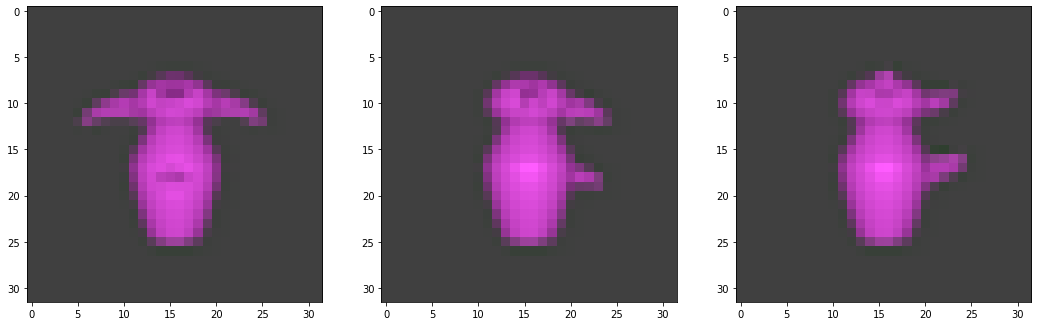

In [167]:
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img_size = 32
normf = 1
# normf = 1/138
# normf = 1./255
# img_size = 224
# img1 = np.array(Image.open('./imgs/f1-11_lamps_000_train.png').convert('L'))
img1 = utils.load_img('./imgs/f1-11_lamps_000_train.png', target_size=(img_size, img_size))
img2 = utils.load_img('./imgs/f1-11_lamps_000_test.png', target_size=(img_size, img_size))
img3 = utils.load_img('./imgs/m1_11_lamps_000_test.png', target_size=(img_size, img_size))
img1 = img1[..., :3] * normf
img2 = img2[..., :3] * normf

f, ax = plt.subplots(1, 3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

print(type(img1))
print(img1.shape)

In [7]:
# Just testing resizing
# from skimage.transform import resize
# plt.rcParams['figure.figsize'] = (18,6)
# print(img1.shape)
# print(img1.dtype)
# print(np.min(img1), np.median(img1), np.max(img1))
# bottle_resized = cv2.resize(img1, (224, 224))
# print(bottle_resized.shape[0])
# print(bottle_resized.dtype)
# print(np.min(img1), np.median(img1), np.max(img1))
# plt.figure()
# plt.axis('off')
# plt.imshow(bottle_resized)
# plt.show()

(32, 32, 3)
Img Min:43.000, Img Median:64.000, Img Max: 230.000


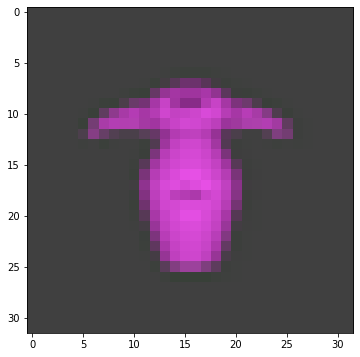

Prediction: [ 27.239553   -5.5131283  -3.8034585   2.2416809   1.574585   12.730628
  10.559321  -31.233374  -30.659166  -25.563702 ]
Predicted class:  0
-31.233374 -1.1144367 27.239553
Img Min:0.169, Img Median:0.251, Img Max: 0.902


In [193]:
from keras.preprocessing import image

pimg = img1
print(pimg.shape)
print("Img Min:{:.3f}, Img Median:{:.3f}, Img Max: {:.3f}".format(np.min(pimg), np.median(pimg), np.max(pimg)))
plt.imshow(pimg)
plt.show()
pimg = image.img_to_array(pimg)
pimg = np.expand_dims(pimg, axis = 0)

# Have to preprocess same as in training for correct prediction?
pimg = pimg / 255.0

y_pred1 = model.predict(pimg[...,:1])[0]
pred1 = np.argmax(y_pred1)
print("Prediction:", y_pred1)
print("Predicted class: ", pred1)
print(np.min(y_pred1), np.median(y_pred1), np.max(y_pred1))
print("Img Min:{:.3f}, Img Median:{:.3f}, Img Max: {:.3f}".format(np.min(pimg), np.median(pimg), np.max(pimg)))

In [31]:
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
print("Done")

Done


<Figure size 1296x432 with 0 Axes>

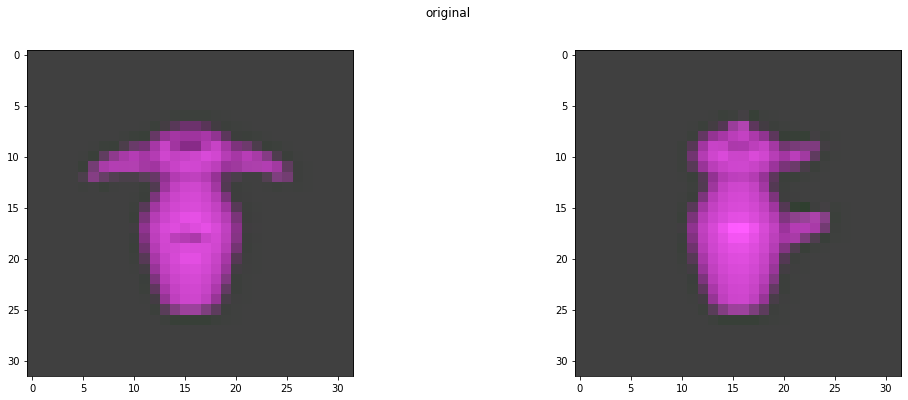

<Figure size 1296x432 with 0 Axes>

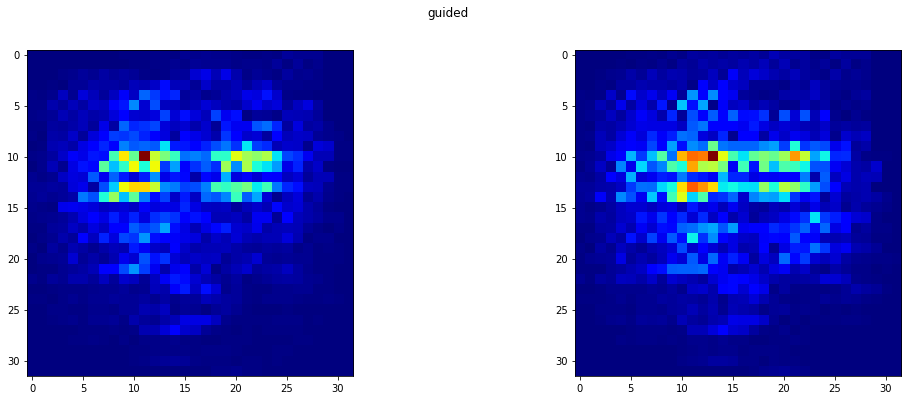

<Figure size 1296x432 with 0 Axes>

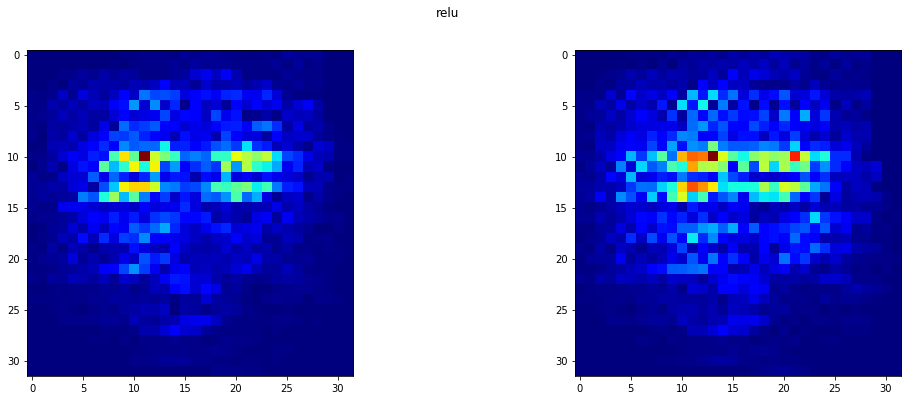

In [89]:
from vis.visualization import visualize_saliency, overlay

for modifier in ['original']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img3]):
        ax[i].imshow(img, cmap='jet')

for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img3]):
        grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img, backprop_modifier=modifier, grad_modifier='absolute')
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')
#         ax[i].imshow(img, cmap='gray', alpha=0.4)

Done


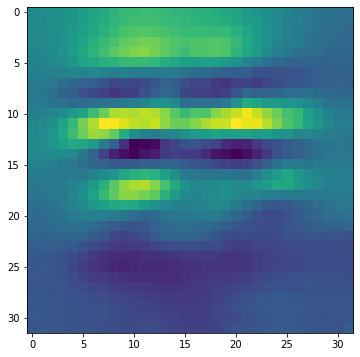

In [205]:
from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
# img = visualize_activation(model, layer_idx, filter_indices=0, verbose=True)

from vis.input_modifiers import Jitter
# Jitter 16 pixels along all dimensions to during the optimization process.
# img = visualize_activation(model, layer_idx, filter_indices=0, verbose=True, max_iter=500, input_modifiers=[Jitter(16)])


# # These parameters seem to show a shape for the softmax layer
# # We will jitter 5% relative to the image size.
# # A value between [0., 1.] is interpreted as a percentage of the image dimension. (Default value: 0.05)
# img = visualize_activation(model, layer_idx, filter_indices=0,
#                            lp_norm_weight=10., tv_weight=0.0005,input_modifiers=[Jitter(0.0005)], max_iter=500, verbose=True)


# These parameters work good from what I can see, there is a texture in later layers, for earlier layers is just solid color
conv_idx = utils.find_layer_idx(model, 'dense_2')
img = visualize_activation(model, conv_idx, filter_indices=0,
                           lp_norm_weight=10, tv_weight=0.005,input_modifiers=[Jitter(0.1)], max_iter=500, verbose=False)
# img = visualize_activation(model, conv_idx, filter_indices=0, lp_norm_weight=2, tv_weight=5, verbose=False)
# print(img)
plt.imshow(np.squeeze(img))

print("Done")

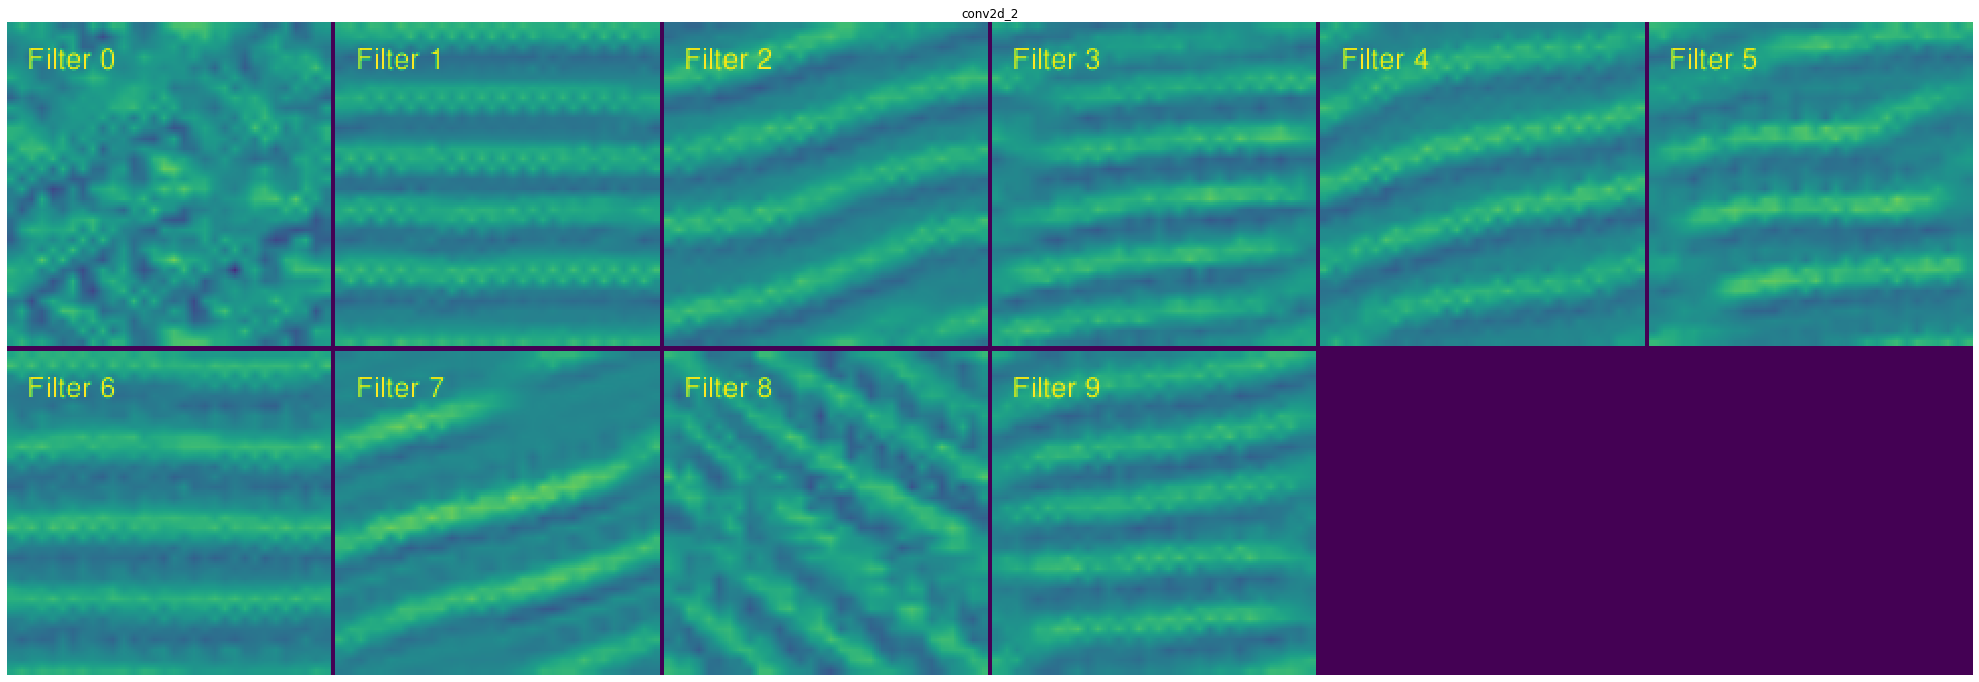

In [123]:
# Visualizing Conv filters

from vis.visualization import get_num_filters
# plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams['figure.figsize'] = (36,12)

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_2'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# print(utils.draw_text.__code__.co_varnames)

# Generate input image for each filter.
vis_images = []
for idx in filters:
#     img = visualize_activation(model, layer_idx, filter_indices=idx, tv_weight=0.005,input_modifiers=[Jitter(0.1)], max_iter=500)
#     img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), lp_norm_weight=10, tv_weight=0.0000001,input_modifiers=[Jitter(0.005)], max_iter=500)
#     img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), tv_weight=0.005,input_modifiers=[Jitter(0.1)], max_iter=500)
#     img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), lp_norm_weight=10, tv_weight=0.0000001,input_modifiers=[Jitter(0.1)], max_iter=500)
    img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), lp_norm_weight=1, tv_weight=0.000000001,input_modifiers=[Jitter(0.2)])
#     img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), lp_norm_weight=1, tv_weight=0.000000001,input_modifiers=[Jitter(0.5)])
    img = cv2.resize(img, (img.shape[1]*5, img.shape[0]*5))
    # Utility to overlay text on image.
    img = img*255
    img = img.astype(np.uint8)
    img = utils.draw_text(img, 'Filter {}'.format(idx),  color=255)
#     img = utils.draw_text(img, 'Filter {}'.format(idx), font='Arial.ttf', font_size=14)
    vis_images.append(img)

# plt.figure(figsize = (36,12))
# Generate stitched image palette with 8 cols.
vis_images_2 = [np.expand_dims(i, axis = 2) for i in vis_images]
stitched = utils.stitch_images(vis_images_2, cols=6, margin=2)
stitched = np.squeeze(stitched)
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

(322, 970)
224


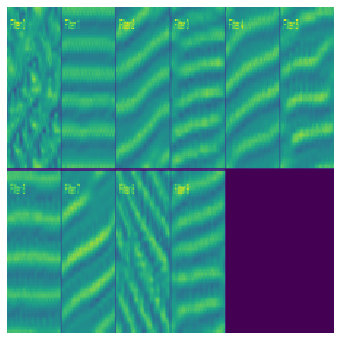

In [124]:
from skimage.transform import resize
plt.rcParams['figure.figsize'] = (18,6)
print(stitched.shape)
bottle_resized = resize(stitched, (224, 224))
print(bottle_resized.shape[0])
plt.figure()
plt.axis('off')
plt.imshow(bottle_resized)
plt.show()

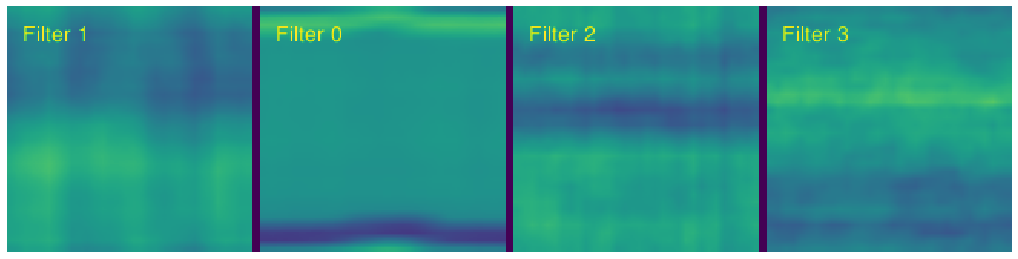

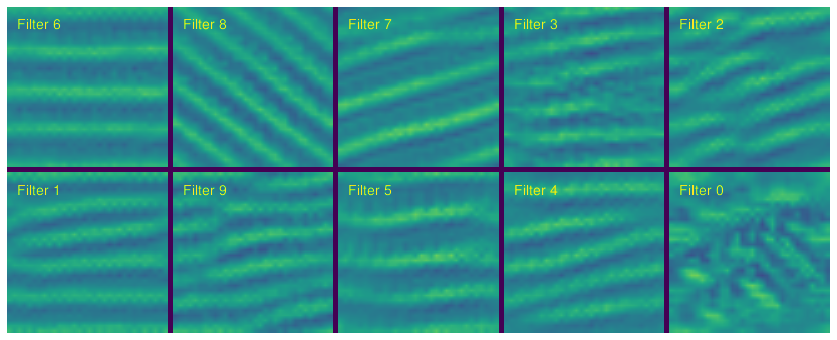

Done


In [144]:
plt.rcParams['figure.figsize'] = (18,6)
selected_indices = []
# for layer_name in ['conv2d_1', 'conv2d_2', 'dense_1', 'dense_2']:
for layer_name in ['conv2d_1', 'conv2d_2']:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
#         img = visualize_activation(model, layer_idx, filter_indices=idx, tv_weight=0.0005,input_modifiers=[Jitter(0.0005)], max_iter=500)
        img = visualize_activation(model, layer_idx, filter_indices=idx, tv_weight=0.0005,input_modifiers=[Jitter(0.1)], max_iter=500)
        img = cv2.resize(img, (img.shape[1]*5, img.shape[0]*5))
        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx), color=255)    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    vis_images_2 = [np.expand_dims(i, axis = 2) for i in vis_images]
    stitched = utils.stitch_images(vis_images_2, cols=5)    
    stitched = np.squeeze(stitched)
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()
    
print("Done")

[6 8 7 3 2 1 9 5 4 0]


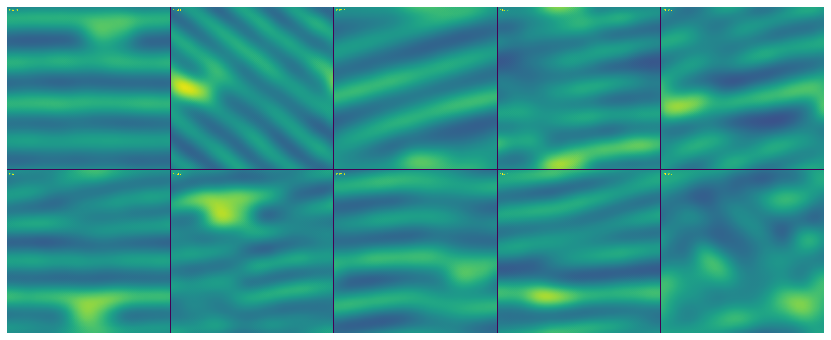

In [146]:
# Generate input image for each filter.
new_vis_images = []
print(filters)
for i, idx in enumerate(filters):
    # We will seed with optimized image this time.
    img = visualize_activation(model, layer_idx, filter_indices=idx, 
                               seed_input=vis_images_2[i],
                               input_modifiers=[Jitter(0.05)])
    img = cv2.resize(img, (img.shape[1]*5, img.shape[0]*5))
    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx), color=255)    
    new_vis_images.append(img)

# Generate stitched image palette with 5 cols so we get 2 rows.
new_vis_images_2 = [np.expand_dims(i, axis = 2) for i in new_vis_images]
stitched = utils.stitch_images(new_vis_images_2, cols=5)
stitched = np.squeeze(stitched)
plt.figure()
plt.axis('off')
plt.imshow(stitched)
plt.show()

2


<Figure size 1296x432 with 0 Axes>

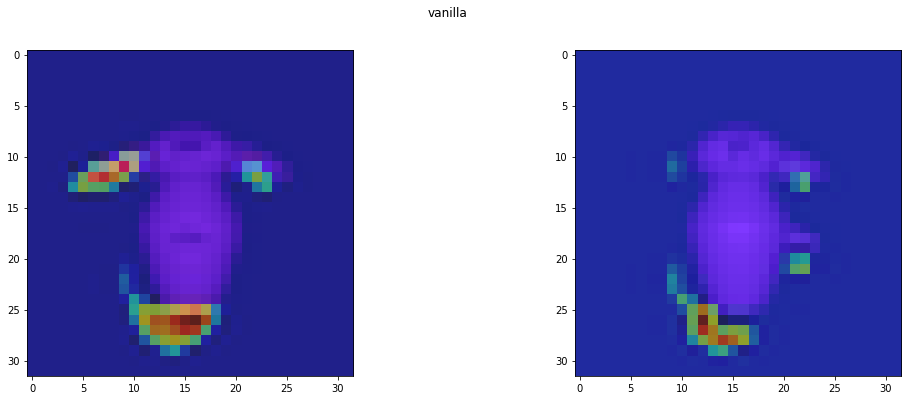

<Figure size 1296x432 with 0 Axes>

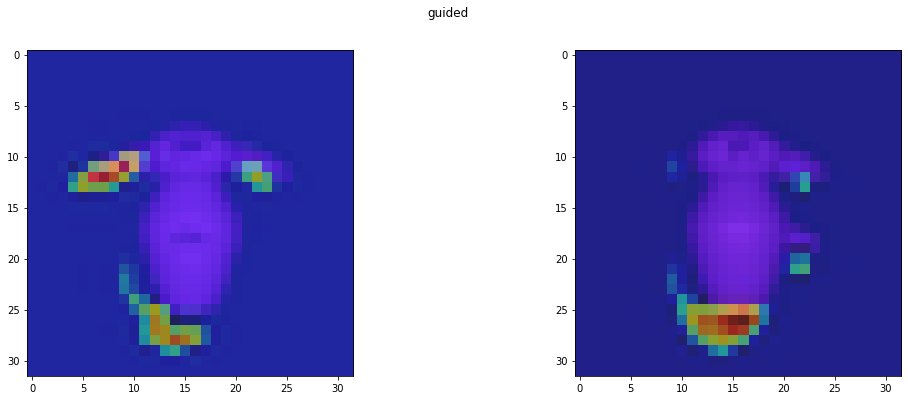

<Figure size 1296x432 with 0 Axes>

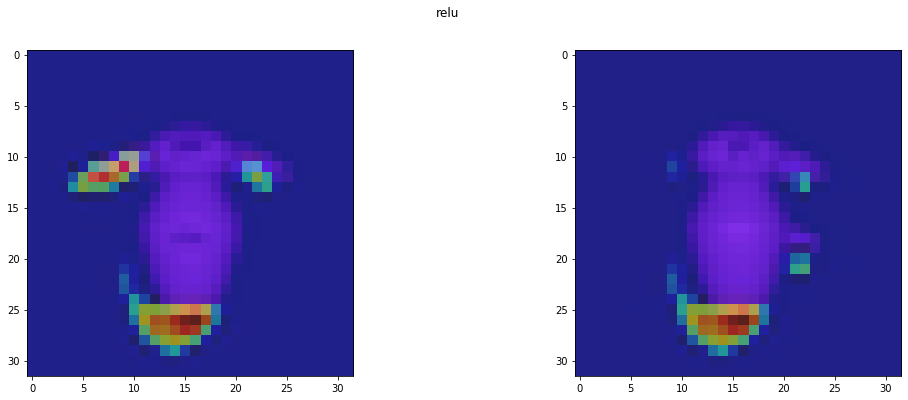

In [220]:
import matplotlib.cm as cm
from vis.visualization import visualize_cam

layer_idx = utils.find_layer_idx(model, 'conv2d_2')
print(layer_idx)

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
#         20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=0,
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))
#         ax[i].imshow(jet_heatmap)
#         ax[i].imshow(overlay(np.dstack((grads,grads,grads)), img))

In [89]:
from vis.losses import ActivationMaximization
from vis.regularizers import TotalVariation, LPNorm
from vis.optimizer import Optimizer
import sys
# importlib.reload(sys.modules['vis.callbacks'])
from vis.callbacks import GifGenerator
from IPython.display import Image

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_name = 'predictions'
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
output_class = [0]

##############
# losses = [
#     (ActivationMaximization(layer_dict[layer_name], output_class), 2),
#     (LPNorm(model.input), 10),
#     (TotalVariation(model.input), 0.)
# ]
# opt = Optimizer(model.input, losses)
# opt.minimize(max_iter=500, verbose=True, input_modifiers=[Jitter(0.05)], callbacks=[GifGenerator('opt_progress', scaling=5)])


# with open('./opt_progress.gif','rb') as f:
#     display(Image(data=f.read(), format='png'))
    
#################################################
conv_idx = 'block3_conv1'
losses = [
    (ActivationMaximization(layer_dict[conv_idx], output_class), 2),
    (LPNorm(model.input), 10),
    (TotalVariation(model.input), 0.005)
]
opt = Optimizer(model.input, losses)
opt.minimize(max_iter=500, verbose=True, input_modifiers=[Jitter(0.1)], callbacks=[GifGenerator('conv{}'.format(conv_idx), scaling=5)])

with open('./conv{}.gif'.format(conv_idx),'rb') as f:
    display(Image(data=f.read(), format='png'))

Iteration: 1, named_losses: [('ActivationMax Loss', -9.692923),
 ('L-6.0 Norm Loss', 1.6209155),
 ('TV(2.0) Loss', 3.0329893)], overall loss: -5.039017677307129
Iteration: 2, named_losses: [('ActivationMax Loss', -9.543299),
 ('L-6.0 Norm Loss', 1.6165867),
 ('TV(2.0) Loss', 2.2136858)], overall loss: -5.71302604675293
Iteration: 3, named_losses: [('ActivationMax Loss', -9.910096),
 ('L-6.0 Norm Loss', 1.6153202),
 ('TV(2.0) Loss', 1.7429616)], overall loss: -6.551814079284668
Iteration: 4, named_losses: [('ActivationMax Loss', -10.157973),
 ('L-6.0 Norm Loss', 1.6161371),
 ('TV(2.0) Loss', 1.4686682)], overall loss: -7.07316780090332
Iteration: 5, named_losses: [('ActivationMax Loss', -10.18606),
 ('L-6.0 Norm Loss', 1.617298),
 ('TV(2.0) Loss', 1.2749597)], overall loss: -7.293802261352539
Iteration: 6, named_losses: [('ActivationMax Loss', -9.8622875),
 ('L-6.0 Norm Loss', 1.6171045),
 ('TV(2.0) Loss', 1.156202)], overall loss: -7.0889811515808105
Iteration: 7, named_losses: [('Acti

Iteration: 52, named_losses: [('ActivationMax Loss', -10.967442),
 ('L-6.0 Norm Loss', 1.6855885),
 ('TV(2.0) Loss', 0.5800563)], overall loss: -8.701796531677246
Iteration: 53, named_losses: [('ActivationMax Loss', -10.959402),
 ('L-6.0 Norm Loss', 1.6869379),
 ('TV(2.0) Loss', 0.5820566)], overall loss: -8.690406799316406
Iteration: 54, named_losses: [('ActivationMax Loss', -11.039615),
 ('L-6.0 Norm Loss', 1.6875525),
 ('TV(2.0) Loss', 0.5816115)], overall loss: -8.770450592041016
Iteration: 55, named_losses: [('ActivationMax Loss', -11.532434),
 ('L-6.0 Norm Loss', 1.6890739),
 ('TV(2.0) Loss', 0.5777691)], overall loss: -9.265591621398926
Iteration: 56, named_losses: [('ActivationMax Loss', -11.454859),
 ('L-6.0 Norm Loss', 1.6907414),
 ('TV(2.0) Loss', 0.5837682)], overall loss: -9.180349349975586
Iteration: 57, named_losses: [('ActivationMax Loss', -11.797094),
 ('L-6.0 Norm Loss', 1.6929086),
 ('TV(2.0) Loss', 0.58237225)], overall loss: -9.52181339263916
Iteration: 58, named_l

Iteration: 103, named_losses: [('ActivationMax Loss', -12.729826),
 ('L-6.0 Norm Loss', 1.7722603),
 ('TV(2.0) Loss', 0.75951713)], overall loss: -10.19804859161377
Iteration: 104, named_losses: [('ActivationMax Loss', -12.860342),
 ('L-6.0 Norm Loss', 1.7722194),
 ('TV(2.0) Loss', 0.776308)], overall loss: -10.311814308166504
Iteration: 105, named_losses: [('ActivationMax Loss', -12.495757),
 ('L-6.0 Norm Loss', 1.767041),
 ('TV(2.0) Loss', 0.79166734)], overall loss: -9.93704891204834
Iteration: 106, named_losses: [('ActivationMax Loss', -12.939394),
 ('L-6.0 Norm Loss', 1.7706015),
 ('TV(2.0) Loss', 0.7939318)], overall loss: -10.374860763549805
Iteration: 107, named_losses: [('ActivationMax Loss', -12.611771),
 ('L-6.0 Norm Loss', 1.7746143),
 ('TV(2.0) Loss', 0.7977689)], overall loss: -10.039387702941895
Iteration: 108, named_losses: [('ActivationMax Loss', -11.687939),
 ('L-6.0 Norm Loss', 1.7698475),
 ('TV(2.0) Loss', 0.8056997)], overall loss: -9.112391471862793
Iteration: 109

Iteration: 153, named_losses: [('ActivationMax Loss', -12.925741),
 ('L-6.0 Norm Loss', 1.8376924),
 ('TV(2.0) Loss', 0.8245704)], overall loss: -10.26347827911377
Iteration: 154, named_losses: [('ActivationMax Loss', -13.258883),
 ('L-6.0 Norm Loss', 1.8375202),
 ('TV(2.0) Loss', 0.8232156)], overall loss: -10.59814739227295
Iteration: 155, named_losses: [('ActivationMax Loss', -13.3875065),
 ('L-6.0 Norm Loss', 1.8396508),
 ('TV(2.0) Loss', 0.82014775)], overall loss: -10.727707862854004
Iteration: 156, named_losses: [('ActivationMax Loss', -12.992036),
 ('L-6.0 Norm Loss', 1.8430554),
 ('TV(2.0) Loss', 0.8265304)], overall loss: -10.322449684143066
Iteration: 157, named_losses: [('ActivationMax Loss', -13.276632),
 ('L-6.0 Norm Loss', 1.8439435),
 ('TV(2.0) Loss', 0.82557607)], overall loss: -10.607112884521484
Iteration: 158, named_losses: [('ActivationMax Loss', -13.518794),
 ('L-6.0 Norm Loss', 1.8441303),
 ('TV(2.0) Loss', 0.826025)], overall loss: -10.848638534545898
Iteration:

Iteration: 203, named_losses: [('ActivationMax Loss', -14.452686),
 ('L-6.0 Norm Loss', 1.9221587),
 ('TV(2.0) Loss', 1.097626)], overall loss: -11.432901382446289
Iteration: 204, named_losses: [('ActivationMax Loss', -15.582691),
 ('L-6.0 Norm Loss', 1.926357),
 ('TV(2.0) Loss', 1.0838486)], overall loss: -12.572484970092773
Iteration: 205, named_losses: [('ActivationMax Loss', -14.535385),
 ('L-6.0 Norm Loss', 1.931157),
 ('TV(2.0) Loss', 1.1088408)], overall loss: -11.495387077331543
Iteration: 206, named_losses: [('ActivationMax Loss', -15.314852),
 ('L-6.0 Norm Loss', 1.9284736),
 ('TV(2.0) Loss', 1.1170316)], overall loss: -12.269346237182617
Iteration: 207, named_losses: [('ActivationMax Loss', -14.494432),
 ('L-6.0 Norm Loss', 1.9387844),
 ('TV(2.0) Loss', 1.1255417)], overall loss: -11.430106163024902
Iteration: 208, named_losses: [('ActivationMax Loss', -14.119772),
 ('L-6.0 Norm Loss', 1.9350367),
 ('TV(2.0) Loss', 1.1249089)], overall loss: -11.059825897216797
Iteration: 20

Iteration: 253, named_losses: [('ActivationMax Loss', -15.268821),
 ('L-6.0 Norm Loss', 2.0065582),
 ('TV(2.0) Loss', 1.2966323)], overall loss: -11.965629577636719
Iteration: 254, named_losses: [('ActivationMax Loss', -15.204399),
 ('L-6.0 Norm Loss', 2.0054948),
 ('TV(2.0) Loss', 1.3044204)], overall loss: -11.89448356628418
Iteration: 255, named_losses: [('ActivationMax Loss', -15.343367),
 ('L-6.0 Norm Loss', 2.0134735),
 ('TV(2.0) Loss', 1.3032128)], overall loss: -12.026679992675781
Iteration: 256, named_losses: [('ActivationMax Loss', -15.053421),
 ('L-6.0 Norm Loss', 2.0160537),
 ('TV(2.0) Loss', 1.3162705)], overall loss: -11.72109603881836
Iteration: 257, named_losses: [('ActivationMax Loss', -15.356949),
 ('L-6.0 Norm Loss', 2.0133765),
 ('TV(2.0) Loss', 1.3146125)], overall loss: -12.028960227966309
Iteration: 258, named_losses: [('ActivationMax Loss', -15.918768),
 ('L-6.0 Norm Loss', 2.0149198),
 ('TV(2.0) Loss', 1.3238864)], overall loss: -12.579961776733398
Iteration: 2

Iteration: 303, named_losses: [('ActivationMax Loss', -15.318867),
 ('L-6.0 Norm Loss', 2.08724),
 ('TV(2.0) Loss', 1.502991)], overall loss: -11.728635787963867
Iteration: 304, named_losses: [('ActivationMax Loss', -16.03379),
 ('L-6.0 Norm Loss', 2.079121),
 ('TV(2.0) Loss', 1.5096384)], overall loss: -12.44503116607666
Iteration: 305, named_losses: [('ActivationMax Loss', -16.387207),
 ('L-6.0 Norm Loss', 2.0803094),
 ('TV(2.0) Loss', 1.5193931)], overall loss: -12.787505149841309
Iteration: 306, named_losses: [('ActivationMax Loss', -16.705168),
 ('L-6.0 Norm Loss', 2.0907629),
 ('TV(2.0) Loss', 1.5276682)], overall loss: -13.086736679077148
Iteration: 307, named_losses: [('ActivationMax Loss', -16.273201),
 ('L-6.0 Norm Loss', 2.0982797),
 ('TV(2.0) Loss', 1.5318244)], overall loss: -12.643096923828125
Iteration: 308, named_losses: [('ActivationMax Loss', -16.604141),
 ('L-6.0 Norm Loss', 2.0968378),
 ('TV(2.0) Loss', 1.5336127)], overall loss: -12.973690032958984
Iteration: 309, 

Iteration: 353, named_losses: [('ActivationMax Loss', -16.248058),
 ('L-6.0 Norm Loss', 2.1553442),
 ('TV(2.0) Loss', 1.7542537)], overall loss: -12.338460922241211
Iteration: 354, named_losses: [('ActivationMax Loss', -16.071644),
 ('L-6.0 Norm Loss', 2.1732993),
 ('TV(2.0) Loss', 1.7605608)], overall loss: -12.13778305053711
Iteration: 355, named_losses: [('ActivationMax Loss', -16.372423),
 ('L-6.0 Norm Loss', 2.173341),
 ('TV(2.0) Loss', 1.7594316)], overall loss: -12.439650535583496
Iteration: 356, named_losses: [('ActivationMax Loss', -16.47601),
 ('L-6.0 Norm Loss', 2.1738513),
 ('TV(2.0) Loss', 1.7653911)], overall loss: -12.53676700592041
Iteration: 357, named_losses: [('ActivationMax Loss', -17.062025),
 ('L-6.0 Norm Loss', 2.1719637),
 ('TV(2.0) Loss', 1.7710464)], overall loss: -13.119014739990234
Iteration: 358, named_losses: [('ActivationMax Loss', -17.357903),
 ('L-6.0 Norm Loss', 2.1647022),
 ('TV(2.0) Loss', 1.7841065)], overall loss: -13.409093856811523
Iteration: 359

Iteration: 403, named_losses: [('ActivationMax Loss', -16.527029),
 ('L-6.0 Norm Loss', 2.218223),
 ('TV(2.0) Loss', 1.9497979)], overall loss: -12.359007835388184
Iteration: 404, named_losses: [('ActivationMax Loss', -17.700907),
 ('L-6.0 Norm Loss', 2.215552),
 ('TV(2.0) Loss', 1.9340566)], overall loss: -13.551298141479492
Iteration: 405, named_losses: [('ActivationMax Loss', -17.84713),
 ('L-6.0 Norm Loss', 2.2165866),
 ('TV(2.0) Loss', 1.9399266)], overall loss: -13.690616607666016
Iteration: 406, named_losses: [('ActivationMax Loss', -17.63099),
 ('L-6.0 Norm Loss', 2.2180815),
 ('TV(2.0) Loss', 1.941506)], overall loss: -13.47140121459961
Iteration: 407, named_losses: [('ActivationMax Loss', -17.548702),
 ('L-6.0 Norm Loss', 2.221581),
 ('TV(2.0) Loss', 1.9417465)], overall loss: -13.385375022888184
Iteration: 408, named_losses: [('ActivationMax Loss', -18.21774),
 ('L-6.0 Norm Loss', 2.221746),
 ('TV(2.0) Loss', 1.9482068)], overall loss: -14.047785758972168
Iteration: 409, nam

Iteration: 453, named_losses: [('ActivationMax Loss', -18.40738),
 ('L-6.0 Norm Loss', 2.2870445),
 ('TV(2.0) Loss', 2.0515122)], overall loss: -14.068822860717773
Iteration: 454, named_losses: [('ActivationMax Loss', -19.272667),
 ('L-6.0 Norm Loss', 2.2898414),
 ('TV(2.0) Loss', 2.0549355)], overall loss: -14.92789077758789
Iteration: 455, named_losses: [('ActivationMax Loss', -18.69394),
 ('L-6.0 Norm Loss', 2.2908745),
 ('TV(2.0) Loss', 2.06006)], overall loss: -14.34300422668457
Iteration: 456, named_losses: [('ActivationMax Loss', -19.400707),
 ('L-6.0 Norm Loss', 2.292493),
 ('TV(2.0) Loss', 2.0546246)], overall loss: -15.0535888671875
Iteration: 457, named_losses: [('ActivationMax Loss', -19.357895),
 ('L-6.0 Norm Loss', 2.294705),
 ('TV(2.0) Loss', 2.0810738)], overall loss: -14.98211669921875
Iteration: 458, named_losses: [('ActivationMax Loss', -20.099705),
 ('L-6.0 Norm Loss', 2.2961824),
 ('TV(2.0) Loss', 2.0899975)], overall loss: -15.71352481842041
Iteration: 459, named_

FileNotFoundError: [Errno 2] No such file or directory: './convblock3_conv1.gif'

In [113]:
# Visualize one image for each class
img_path = os.path.join(os.getcwd(),"images-keras-original","test")
os.listdir(img_path)

['f1', 'f2', 'f3', 'f4', 'f5', 'm1', 'm2', 'm3', 'm4', 'm5']

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
img_size = 32

img1 = utils.load_img('../images/f1-11_lamps_002.png', target_size=(img_size, img_size))
img2 = utils.load_img('../images/f2_21_lamps_019.png', target_size=(img_size, img_size))
img1 = img1[..., :3]
img2 = img2[..., :3]

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(x_test[idx][..., 0])
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                                   seed_input=x_test[idx], backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='jet')


for modifier in ['original']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):
        ax[i].imshow(img, cmap='jet')

for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=0, seed_input=img, backprop_modifier=modifier, grad_modifier='absolute')
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')
#         ax[i].imshow(img, cmap='gray', alpha=0.6)

In [ ]:
# from PIL import Image

# # Create mini-batch for demo

# # height, width = 224,224
# height, width = 224,224

# img1 = utils.load_image("./demo.png", normalize=False, height=height, width=width)
# img2 = utils.load_image("./shihtzu_mypuppy.jpg", normalize=False, height=height, width=width)
# img3 = utils.load_image("./tiger.jpg", normalize=False, height=height, width=width)

# batch1_img = img1.reshape((1, height, width, 3))
# batch1_label = np.array([1 if i == 242 else 0 for i in range(1000)])  # 1-hot result for Boxer
# batch1_label = batch1_label.reshape(1, -1)

# batch2_img = img2.reshape((1, height, width, 3))
# batch2_label = np.array([1 if i == 155 else 0 for i in range(1000)])  # 1-hot result for Shih-Tzu
# batch2_label = batch2_label.reshape(1, -1)

# batch3_img = img3.reshape((1, height, width, 3))
# print(batch3_img.shape)
# batch3_label = np.array([1 if i == 292 else 0 for i in range(1000)])  # 1-hot result for tiger
# batch3_label = batch3_label.reshape(1, -1)

# batch_img = np.concatenate((batch1_img, batch3_img), 0)
# batch_label = np.concatenate((batch1_label, batch3_label), 0)
# batch_size = 2